# Solving the Simple Harmonic Oscillator ODEs
See: https://www.complexityexplorer.org/courses/79-nonlinear-dynamics-mathematical-and-computational-approaches-fall-2017/segments/6271

In [2]:
function forward_euler_solver(x_curr; ODE=(f(x)=[0 1; -1 0]*x), t_step=.1)
    # "Explicit" solver
    x_next = x_curr + t_step * ODE(x_curr)
    return x_next
end

forward_euler_solver (generic function with 1 method)

In [3]:
forward_euler_solver([1;0])

2-element Array{Float64,1}:
  1.0
 -0.1

In [4]:
function backward_euler(x_curr; ODE=(x -> [0 1; -1 0]*x), t_step=.1)
    # Implicit Solver
    x_rough = forward_euler_solver(x_curr, ODE=ODE, t_step=t_step)
    x_next = x_curr + t_step*ODE(x_rough)
end

backward_euler (generic function with 1 method)

In [5]:
function iterate_solver(;solver=(s(x) = x), init_condition=[1;1], steps=10)
    #assumes init_condition at t=0
    #solver is numerical ode that takes in x and outputs x_next
    #init_condition is an array of (pos, vel.) (x)
    #ODE takes in x and outputs xdot
    states = zeros(steps,2)
    x = init_condition
    for i = 1:steps
        x = solver(x)
        states[i,:] = x
    end
    return states
end

iterate_solver (generic function with 1 method)

In [6]:
ode(x) = [ 0 1; -4 0]*x #SHO with k=2, m=.5, B=0, g=0

ode (generic function with 1 method)

In [7]:
ode([2,1.1])

2-element Array{Float64,1}:
  1.1
 -8.0

In [58]:
o(x) = [0 1; -2 0]*x
fs(x) = forward_euler_solver(x, ODE=o, t_step=.05)
iterate_solver(solver=fs, init_condition=[-1; -2], steps=10)

10×2 Array{Float64,2}:
 -1.1      -1.9     
 -1.195    -1.79    
 -1.2845   -1.6705  
 -1.36803  -1.54205 
 -1.44513  -1.40525 
 -1.51539  -1.26073 
 -1.57843  -1.1092  
 -1.63389  -0.951353
 -1.68145  -0.787964
 -1.72085  -0.619819

In [9]:
j(x) = backward_euler(x, t_step=.1, ODE = ode)
iterate_solver(solver=j, init_condition=[-1;-2], steps=5)

5×2 Array{Float64,2}:
 -1.16     -1.52     
 -1.2656   -0.9952   
 -1.3145   -0.449152 
 -1.30683   0.0946125
 -1.2451    0.613561 

In [10]:
using PyPlot

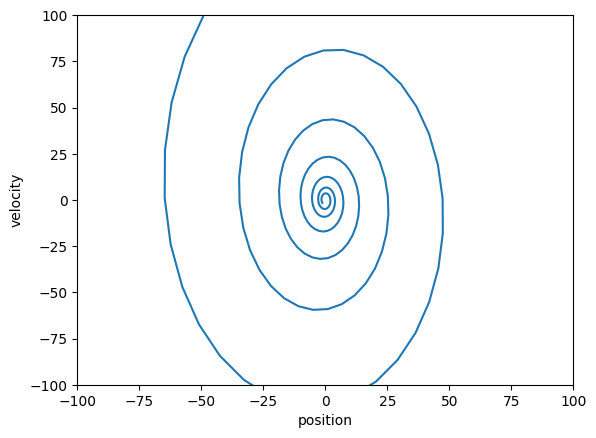

PyObject <matplotlib.text.Text object at 0x7fdd60314650>

In [11]:
s(x) = forward_euler_solver(x, ODE=ode, t_step=.1)
states = iterate_solver(solver=s, init_condition=[-1;-2], steps=200 )
plot(states[:,1], states[:,2])
xlim([-100,100])
ylim([-100,100])
xlabel("position")
ylabel("velocity")
#states[1,:]

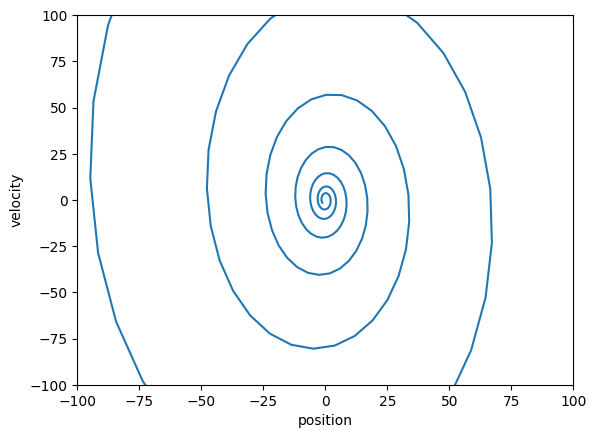

PyObject <matplotlib.text.Text object at 0x7fdd60276310>

In [12]:
r(x) = forward_euler_solver(x, ODE=ode, t_step=.11)
states = iterate_solver(solver=r, init_condition=[-1;-2], steps=200 )
plot(states[:,1], states[:,2])
#states[1,:]
xlim([-100,100])
ylim([-100,100])
xlabel("position")
ylabel("velocity")

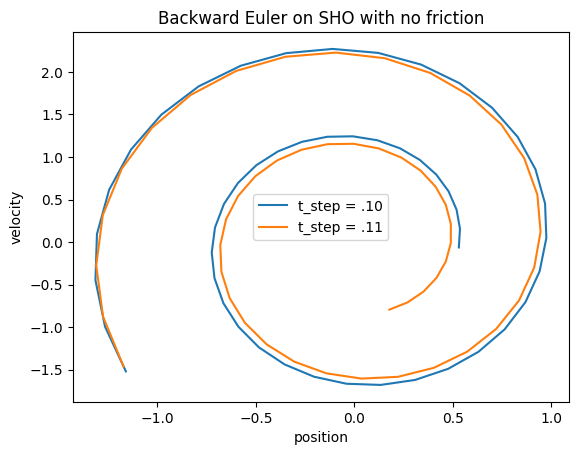

PyObject <matplotlib.text.Text object at 0x7fdd5e5fb610>

In [56]:
s(x) = backward_euler(x, ODE=ode, t_step=.10)
l(x) = backward_euler(x, ODE=ode, t_step=.11)
n = 50
states_s = iterate_solver(solver=s, init_condition=[-1;-2], steps=n )
states_b = iterate_solver(solver=l, init_condition=[-1;-2], steps=n )
plot(states_s[:,1], states_s[:,2], label="t_step = .10")
plot(states_b[:,1], states_b[:,2], label="t_step = .11")
xlabel("position")
ylabel("velocity")
#states[1,:]
legend()
title("Backward Euler on SHO with no friction")

## Question 4
*Forward and backward Euler employ different information about the vector field to move forwards in state space.  Based on your experience with these two methods, derive a third method that uses both a forward and backward Euler step to improve accuracy.*

Ideas:
- average the two results >> on this now
- sum the two results (vector sum)

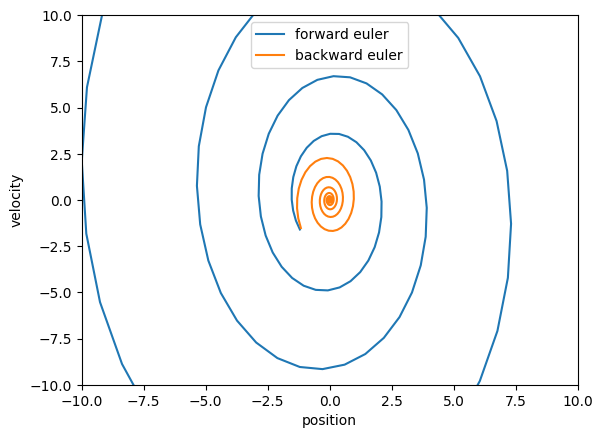

PyObject <matplotlib.legend.Legend object at 0x7fdd6001e190>

In [14]:
step = .1
n_step = 200
F(x) = forward_euler_solver(x, ODE=ode, t_step=step)
B(x) = backward_euler(x, ODE=ode, t_step=step)
states_f = iterate_solver(solver=F, init_condition=[-1;-2], steps=n_step )
states_b = iterate_solver(solver=B, init_condition=[-1;-2], steps=n_step )
plot(states_f[:,1], states_f[:,2], label="forward euler")
plot(states_b[:,1], states_b[:,2], label="backward euler")
xlim([-10,10])
ylim([-10,10])
xlabel("position")
ylabel("velocity")
legend()

In [15]:
function mean_vector(a,b)
    c = hcat(a,b)
    m = mean(c,2)
    return m
end

mean_vector (generic function with 1 method)

In [16]:
#NOTE: has been determined to not be a good method (see below)!
function average_forward_backward(x_curr; ODE=(f(x)=[0 1; -1 0]*x), t_step=.1)
    x_f = forward_euler_solver(x_curr)
    x_b = backward_euler(x_curr)
    x_mean = mean_vector(x_f, x_b)
    return x_mean
end

average_forward_backward (generic function with 1 method)

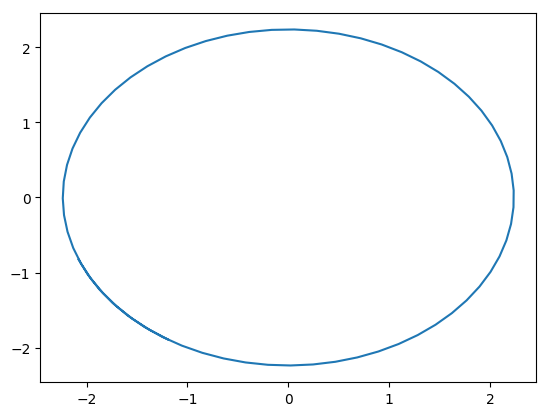

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdd5ff66dd0>

In [17]:
n_step = 70
#P(x) = forward_euler_solver(x, t_step= 100)
P(x) = average_forward_backward(x, t_step=.01)
states = iterate_solver(solver=P, init_condition=[-1;-2], steps=n_step )
ax = plot(states[:,1], states[:,2])


### Observation
Using the average vector (element wise average so x = Avg(p1, p2), y = Avg(v1, v2) of vectors (p,v) ) results in a more accurate description of the system's dynamics: a cycle! BUT be careful. It might be that doing the average works well for circular state-space trajectories!

In [24]:
k = 2
m = .5
b = 1.0
sho_dissipative(x) = [ 0 1; -k/m -b/m]*x

sho_dissipative (generic function with 1 method)

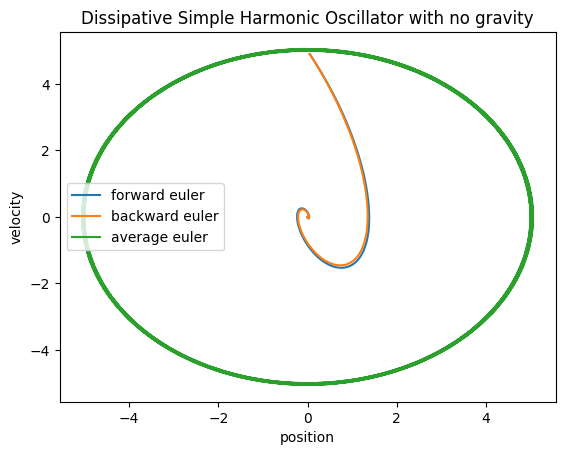

PyObject <matplotlib.legend.Legend object at 0x7fdd5ead5dd0>

In [48]:
n_step = 900
F(x) = forward_euler_solver(x, ODE = sho_dissipative, t_step=.01)
B(x) = backward_euler(x, ODE = sho_dissipative, t_step=.01)
A(x) = average_forward_backward(x, ODE = sho_dissipative, t_step=.01)
x_o = [0; 5]
states_F = iterate_solver(solver=F, init_condition=x_o, steps=n_step )
states_B = iterate_solver(solver=B, init_condition=x_o, steps=n_step )
states_A = iterate_solver(solver=A, init_condition=x_o, steps=n_step )
ax = plot(states_F[:,1], states_F[:,2], label="forward euler")
ax = plot(states_B[:,1], states_B[:,2], label="backward euler")
ax = plot(states_A[:,1], states_A[:,2], label="average euler")
title("Dissipative Simple Harmonic Oscillator with no gravity")
xlabel("position")
ylabel("velocity")
legend()

## Observation
The averaging is not a good idea. Dissipative system definetly should come to a fixed point, so the result from the averaged forward/backward euler is giving a spurious result

## Code Comment
I was trying to make this code very modular, but in the end it became a little annoying to constantly configure it, and it would have been nice to specify the end time. Given the simplicity of the questions, I think would would have been better to have fewer functions that have more internally hardcoded variables. But of course it was hard to gauge how much change the questions would demand.